In [2]:
pip install chart-studio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # statistical data visualization

# -- plotly
import chart_studio.plotly as py  # Updated to chart-studio
from plotly.offline import iplot  # Updated to chart-studio
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go

# Initialize notebook mode for offline plotting
init_notebook_mode(connected=True)
# --

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [4]:
data = pd.read_csv('../dataset6/jm1.csv')

> **About this Software Defect Prediction Dataset**
 
This is a Promise data set made publicly available in order to encourage repeatable, verifiable, refutable, and/or improvable predictive models of software engineering.

>***Attribute Information:***
 1. loc                                    : numeric % McCabe's line count of code
 2. v(g)                                  : numeric % McCabe "cyclomatic complexity"
 3. ev(g)                                : numeric % McCabe "essential complexity"
 4. iv(g)                                 : numeric % McCabe "design complexity"
 5. n                                      : numeric % Halstead total operators + operands
 6. v                                       : numeric % Halstead "volume"
 7. l                                        : numeric % Halstead "program length"
 8. d                                      : numeric % Halstead "difficulty"
 9. i                                        : numeric % Halstead "intelligence"
 10. e                                     : numeric % Halstead "effort"
 11. b                                      : numeric % Halstead 
 12. t                                      : numeric % Halstead's time estimator
 13. lOCode                          : numeric % Halstead's line count
 14. lOComment                  : numeric % Halstead's count of lines of comments
 15. lOBlank                          : numeric % Halstead's count of blank lines
 16. lOCodeAndComment  : numeric
 17. uniq_Op                          : numeric % unique operators
 18. uniq_Opnd                     : numeric % unique operands
 19. total_Op                         : numeric % total operators
 20. total_Opnd                    : numeric % total operands
 21. branchCount                 : numeric % of the flow graph
 22. defects                          : {false,true} % module has/has not one or more reported defects

> **Data Discovery & Visualization**

In [5]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [6]:
data.head() #shows first 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [7]:
data.tail() #shows last 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False
10884,19.0,3.0,1.0,1.0,58.0,272.63,0.09,11.57,23.56,3154.67,...,13,0,2,1,12,14,31,27,5,False


In [8]:
data.sample(10) #shows random rows (sample(number_of_rows))

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
1795,25.0,1.0,1.0,1.0,54.0,244.27,0.22,4.59,53.24,1120.78,...,13,0,4,6,6,17,28,26,1,True
1271,8.0,2.0,1.0,2.0,14.0,50.19,0.25,4.00,12.55,200.76,...,4,0,2,0,8,4,10,4,3,True
718,40.0,7.0,1.0,5.0,107.0,548.83,0.05,19.50,28.15,10702.25,...,30,1,5,2,15,20,55,52,13,True
6367,124.0,39.0,10.0,4.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,77,False
3200,37.0,9.0,7.0,5.0,103.0,536.57,0.04,27.87,19.26,14952.52,...,26,0,5,2,22,15,65,38,17,False
1631,66.0,6.0,5.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,11,True
3125,5.0,1.0,1.0,1.0,11.0,36.54,0.33,3.00,12.18,109.62,...,2,0,1,0,6,4,7,4,1,False
2275,28.0,5.0,3.0,4.0,68.0,311.78,0.05,18.90,16.50,5892.59,...,20,4,2,0,14,10,41,27,9,False
6680,5.0,1.0,1.0,1.0,8.0,20.68,0.67,1.50,13.79,31.02,...,5,0,0,0,3,3,5,3,1,False
3744,7.0,1.0,1.0,1.0,33.0,122.11,0.18,5.57,21.92,680.35,...,4,0,1,0,6,7,20,13,1,False


In [9]:
data.shape #shows the number of rows and columns

(10885, 22)

In [10]:
data.describe() #shows simple statistics (min, max, mean, etc.)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [11]:
defects_true_false = data.groupby('defects')['b'].apply(lambda x: x.count()) #defect rates (true/false)
print('False : ' , defects_true_false[0])
print('True : ' , defects_true_false[1])

False :  8779
True :  2106


C:\Users\escan\AppData\Local\Temp\ipykernel_8620\2832918302.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\escan\AppData\Local\Temp\ipykernel_8620\2832918302.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



> * **Histogram**

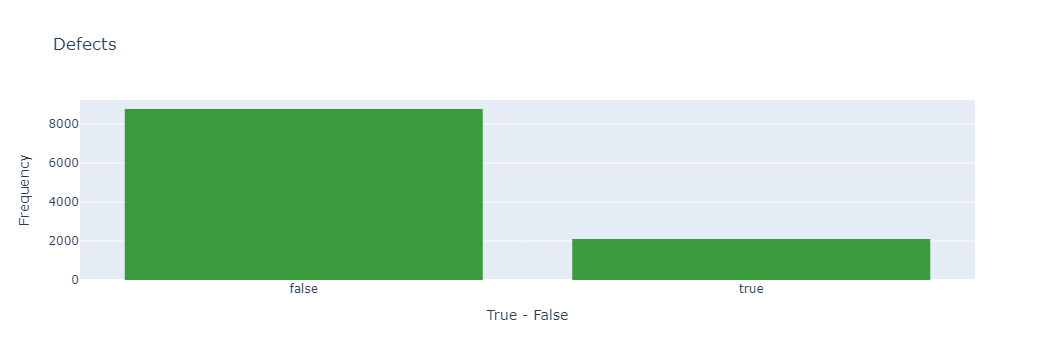

In [16]:
trace = go.Histogram(
    x = data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

> * **Covariance**

Covariance is a measure of the directional relationship between the returns on two risky assets. A positive covariance means that asset returns move together while a negative covariance means returns move inversely.

In [36]:
object_columns = data.select_dtypes(include='object').columns

for col in object_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [38]:
data.corr() #shows coveriance matrix

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.817757,0.517551,0.784057,0.881795,0.900293,-0.286587,0.689543,0.499946,0.750564,...,0.921918,0.612858,0.803573,0.278119,0.536681,0.764622,0.880967,0.868275,0.830194,0.245388
v(g),0.817757,1.000000,0.701710,0.859590,0.730781,0.759881,-0.252902,0.669057,0.303031,0.709501,...,0.799915,0.384506,0.538366,0.209811,0.647430,0.700514,0.744164,0.696078,0.971958,0.208644
ev(g),0.517551,0.701710,1.000000,0.639574,0.465992,0.445902,-0.233982,0.434009,0.213211,0.315538,...,0.454604,0.294208,0.338243,0.190911,0.263000,0.337031,0.479935,0.435518,0.785553,0.172973
iv(g),0.784057,0.859590,0.639574,1.000000,0.702415,0.743193,-0.197736,0.575369,0.309717,0.757702,...,0.775873,0.351583,0.541296,0.207028,0.500750,0.617966,0.715244,0.668940,0.858994,0.181984
n,0.881795,0.730781,0.465992,0.702415,1.000000,0.984276,-0.240749,0.808113,0.651209,0.716536,...,0.944383,0.596374,0.798561,0.284391,0.610412,0.836171,0.995689,0.989484,0.747894,0.204143
v,0.900293,0.759881,0.445902,0.743193,0.984276,1.000000,-0.198104,0.752206,0.598743,0.800000,...,0.962078,0.576844,0.792330,0.266537,0.606993,0.852296,0.981565,0.971960,0.759971,0.189136
l,-0.286587,-0.252902,-0.233982,-0.197736,-0.240749,-0.198104,1.000000,-0.347215,-0.166801,-0.062026,...,-0.218373,-0.165885,-0.223670,-0.106117,-0.305331,-0.234892,-0.237325,-0.241023,-0.279126,-0.164917
d,0.689543,0.669057,0.434009,0.575369,0.808113,0.752206,-0.347215,1.000000,0.398162,0.574298,...,0.768188,0.502121,0.637211,0.253793,0.749305,0.639686,0.817546,0.777732,0.671976,0.169629
i,0.499946,0.303031,0.213211,0.309717,0.651209,0.598743,-0.166801,0.398162,1.000000,0.209268,...,0.563920,0.392551,0.572352,0.217810,0.391646,0.726696,0.620676,0.687891,0.325796,0.192831
e,0.750564,0.709501,0.315538,0.757702,0.716536,0.800000,-0.062026,0.574298,0.209268,1.000000,...,0.809070,0.384806,0.600649,0.148693,0.482061,0.586805,0.735802,0.673490,0.667886,0.086036


> * **Heatmap**

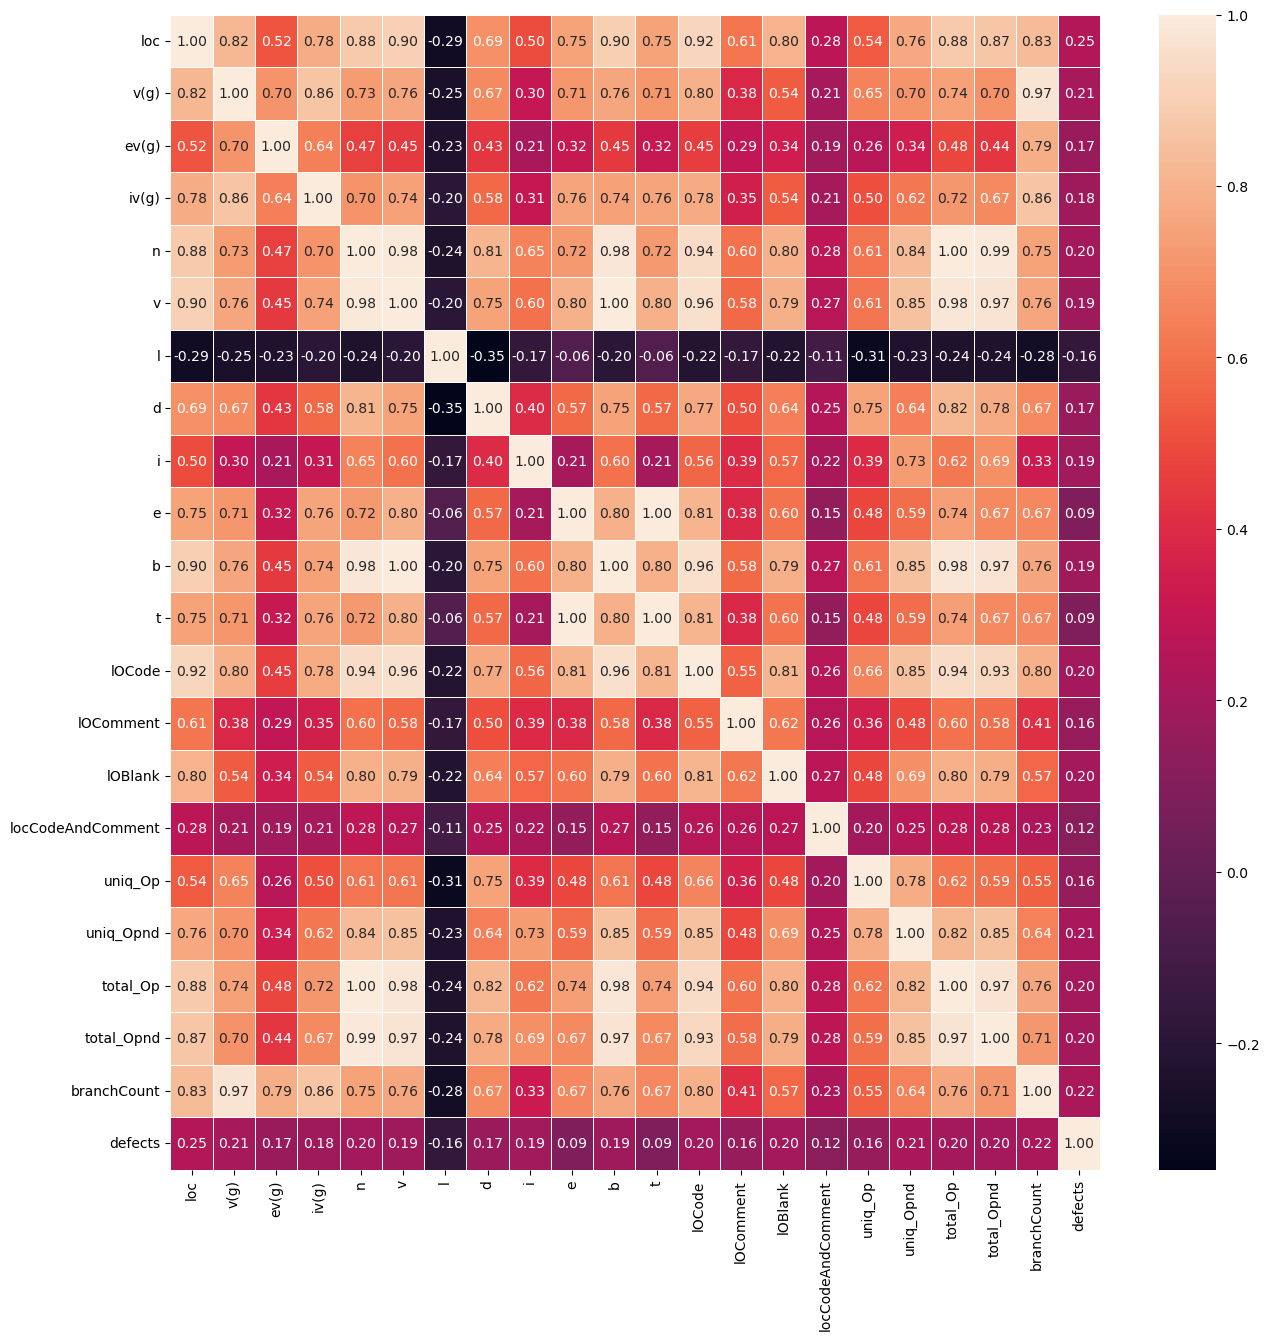

In [39]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

> *The light color in the heat map indicates that the covariance is high. (Ex. "v-b" , "v-n", etc.)*

> *The dark color in the heat map indicates that the covariance is low. (Ex. "loc-l" , "l-d", etc.)*

> * **Scatter Plot **

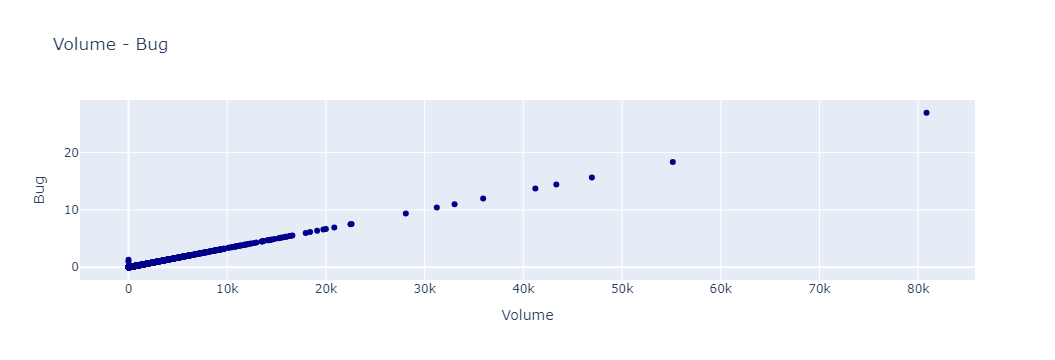

In [40]:
trace = go.Scatter(
    x = data.v,
    y = data.b,
    mode = "markers",
    name = "Volume - Bug",
    marker = dict(color = 'darkblue'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Volume - Bug',
              xaxis = dict(title = 'Volume', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

#two attributes with high correlation v-b > just about 1

> **Data Preprocessing**

In [41]:
data.isnull().sum() #shows how many of the null

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

> *No missing value. *

> *No data cleaning needed because the data is all important.*

>*  **Outlier Detection (Box Plot)**

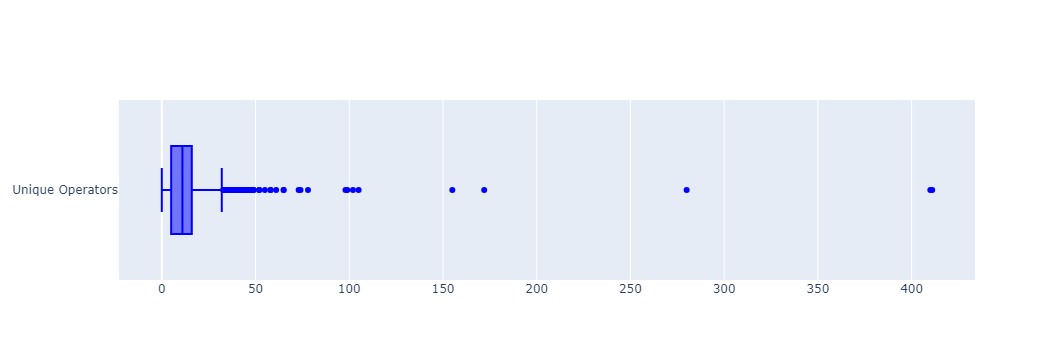

In [42]:
trace1 = go.Box(
    x = data.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)

*Showing all information when clicking on plot (min, max, q1, q2, etc.).*

>*  **Feature Extraction**

In [43]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]

In [44]:
evaluation_control(data)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,Succesful
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,17.0,36.0,112.0,86.0,13.0,True,Redesign
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,17.0,135.0,329.0,271.0,5.0,True,Redesign
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,11.0,16.0,76.0,50.0,7.0,True,Succesful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,2,0,10.0,15.0,30.0,22.0,7.0,False,Succesful
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,2,0,12.0,8.0,19.0,11.0,3.0,False,Succesful
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,1,10,0,18.0,15.0,59.0,44.0,7.0,False,Succesful
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,2,0,9.0,8.0,21.0,15.0,1.0,False,Succesful


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   v                     10885 non-null  float64
 6   l                     10885 non-null  float64
 7   d                     10885 non-null  float64
 8   i                     10885 non-null  float64
 9   e                     10885 non-null  float64
 10  b                     10885 non-null  float64
 11  t                     10885 non-null  float64
 12  lOCode                10885 non-null  int64  
 13  lOComment             10885 non-null  int64  
 14  lOBlank               10885 non-null  int64  
 15  locCodeAndComment  

In [46]:
data.groupby("complexityEvaluation").size() #complexityEvalution rates (Succesfull/redisgn)

complexityEvaluation
Redesign     1725
Succesful    9160
dtype: int64

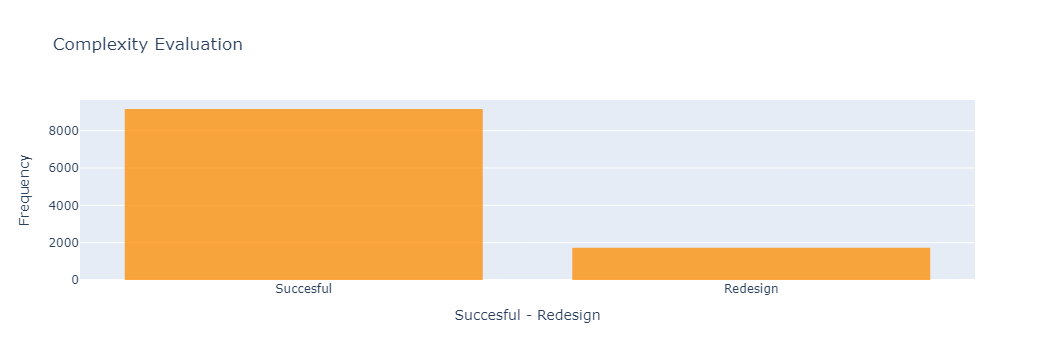

In [47]:
# Histogram
trace = go.Histogram(
    x = data.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Succesful - Redesign'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

> * **Data Normalization  (Min-Max Normalization)**

In [48]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,True,Succesful,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1,17.0,36.0,112.0,86.0,13.0,True,Redesign,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,2,17.0,135.0,329.0,271.0,5.0,True,Redesign,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,0,11.0,16.0,76.0,50.0,7.0,True,Succesful,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,10.0,15.0,30.0,22.0,7.0,False,Succesful,0.002987,0.002968
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,12.0,8.0,19.0,11.0,3.0,False,Succesful,0.001604,0.001484
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,0,18.0,15.0,59.0,44.0,7.0,False,Succesful,0.006427,0.006308
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,9.0,8.0,21.0,15.0,1.0,False,Succesful,0.001820,0.001855


In [49]:
scaled_data = pd.concat([data.v , data.b , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000016,0.048237
1,1.00,1.00,0.000012,0.037106
2,1134.13,0.38,0.014029,0.014100
3,4348.76,1.45,0.053793,0.053803
4,599.12,0.20,0.007411,0.007421
...,...,...,...,...
10880,241.48,0.08,0.002987,0.002968
10881,129.66,0.04,0.001604,0.001484
10882,519.57,0.17,0.006427,0.006308
10883,147.15,0.05,0.001820,0.001855


>**Model Selection**

>* **Naive Bayes**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   v                     10885 non-null  float64
 6   l                     10885 non-null  float64
 7   d                     10885 non-null  float64
 8   i                     10885 non-null  float64
 9   e                     10885 non-null  float64
 10  b                     10885 non-null  float64
 11  t                     10885 non-null  float64
 12  lOCode                10885 non-null  int64  
 13  lOComment             10885 non-null  int64  
 14  lOBlank               10885 non-null  int64  
 15  locCodeAndComment  

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = data.iloc[:, :-10].values  #Select related attribute values for selection
Y = data.complexityEvaluation.values   #Select classification attribute values

In [55]:
Y

array(['Succesful', 'Succesful', 'Redesign', ..., 'Succesful',
       'Succesful', 'Succesful'], dtype=object)

In [56]:
#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [57]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [59]:
#Calculation of ACC value by K-fold cross validation of NB model
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits = 10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)

In [60]:
cv_results

array([0.98507463, 0.98277842, 0.9793341 , 0.97014925, 0.98163031,
       0.9793341 , 0.98392652, 0.9793341 , 0.98045977, 0.97586207])

In [61]:
msg = "Mean : %f - Std : (%f)" % (cv_results.mean(), cv_results.std())
msg

'Mean : 0.979788 - Std : (0.004084)'

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

    Redesign       0.93      0.94      0.94       319
   Succesful       0.99      0.99      0.99      1858

    accuracy                           0.98      2177
   macro avg       0.96      0.97      0.96      2177
weighted avg       0.98      0.98      0.98      2177

[[ 301   18]
 [  22 1836]]
ACC:  0.9816260909508497


In [76]:
y_pred

array([-0.06312398,  0.05115992,  0.58448478, ..., -0.06312398,
       -0.00979149,  0.91971754])

> * **Linear Regression**

In [63]:
    sel_loc = data['loc']
    sel_b = data['b']
    selected_data = pd.concat([sel_loc, sel_b], axis=1)
    selected_data
    #data selected for selection

,loc,b
0,1.1,1.30
1,1.0,1.00
2,72.0,0.38
3,190.0,1.45
4,37.0,0.20
...,...,...
10880,18.0,0.08
10881,9.0,0.04
10882,42.0,0.17
10883,10.0,0.05


In [64]:
selected_data.describe() #shows simple statistics (min, max, mean, etc.)

,loc,b
count,10885.000000,10885.000000
mean,42.016178,0.224766
std,76.593332,0.646408
min,1.000000,0.000000
25%,11.000000,0.020000
50%,23.000000,0.070000
75%,46.000000,0.210000
max,3442.000000,26.950000


In [65]:
selected_data.corr() #shows coveriance matrix

,loc,b
loc,1.000000,0.899965
b,0.899965,1.000000


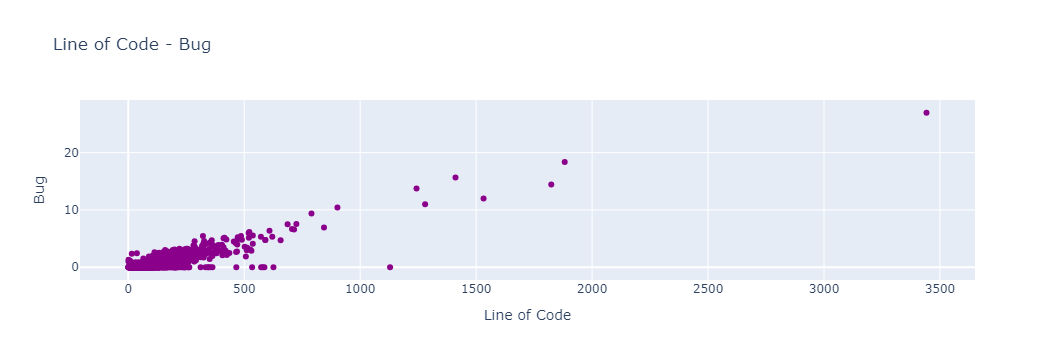

In [66]:
#Scatter Plot
trace = go.Scatter(
    x = data['loc'],
    y = data.b,
    mode = "markers",
    name = "Line of Code - Bug",
    marker = dict(color = 'darkmagenta'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Line of Code - Bug',
              xaxis = dict(title = 'Line of Code', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

In [67]:
Y = selected_data['b'].values  
X = selected_data['loc'].values  
X = X.reshape(-1,1)
#Select the X and Y values for selection
Y

array([1.3 , 1.  , 0.38, ..., 0.17, 0.05, 0.09])

In [68]:
#Parsing selection and verification datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [69]:
#Creation of Linear Regression model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)  

LinearRegression()

In [70]:
# Intercept & Coef
print("Intercept :", model.intercept_)  
print("Coef :", model.coef_)

Intercept : -0.09359968647139832
Coef : [0.00761893]


In [71]:
X_test

array([[  4.],
       [ 19.],
       [ 89.],
       ...,
       [  4.],
       [ 11.],
       [133.]])

In [72]:
y_pred = model.predict(X_test) 

In [73]:
# New data (real , estimated)
new_data = pd.DataFrame({'real': y_test, 'estimated': y_pred})  
new_data

,real,estimated
0,0.00,-0.063124
1,0.08,0.051160
2,0.50,0.584485
3,0.09,0.028303
4,0.26,0.249252
...,...,...
2172,0.06,0.005446
2173,0.03,-0.002173
2174,0.00,-0.063124
2175,0.03,-0.009791


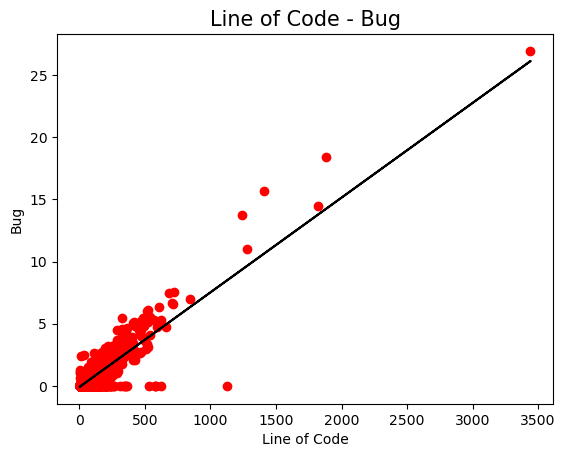

In [74]:
#The nearest line of all values in the model
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = model.predict(X_train)
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'black')
plt.title('Line of Code - Bug', size = 15)  
plt.xlabel('Line of Code')  
plt.ylabel('Bug')  
plt.show() 

In [75]:
#The results of the model. (This uses the Least squares method and the Root mean square error methods)
#In general, as these values are calculated as the mean value and the difference difference, it is considered that the model has better estimation ability as it approaches 0.
from sklearn import metrics   
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Squared Error (MSE): 0.06344413069339935
Root Mean Squared Error (RMSE): 0.25188118368270257


>*When we look at the values, the fact that the values are close to zero shows us that the model has good predictive ability.*

*- THE END -*

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [78]:
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,True,Succesful,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1,17.0,36.0,112.0,86.0,13.0,True,Redesign,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,2,17.0,135.0,329.0,271.0,5.0,True,Redesign,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,0,11.0,16.0,76.0,50.0,7.0,True,Succesful,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,10.0,15.0,30.0,22.0,7.0,False,Succesful,0.002987,0.002968
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,12.0,8.0,19.0,11.0,3.0,False,Succesful,0.001604,0.001484
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,0,18.0,15.0,59.0,44.0,7.0,False,Succesful,0.006427,0.006308
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,9.0,8.0,21.0,15.0,1.0,False,Succesful,0.001820,0.001855


In [79]:
data["complexityEvaluation"].unique()

array(['Succesful', 'Redesign'], dtype=object)

In [85]:
encoder = LabelEncoder()

data["complexityEvaluation"] = encoder.fit_transform(data["complexityEvaluation"])
data["complexityEvaluation"].unique()

array([1, 0])

In [104]:
X = data.drop(["complexityEvaluation"], axis=1)
y = data["complexityEvaluation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [106]:
y_pred = model.predict(X_test)

In [107]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [108]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 0.00045934772622875517
Root Mean Squared Error (RMSE): 0.021432398984452376
R2 Score: 0.9966265948907711


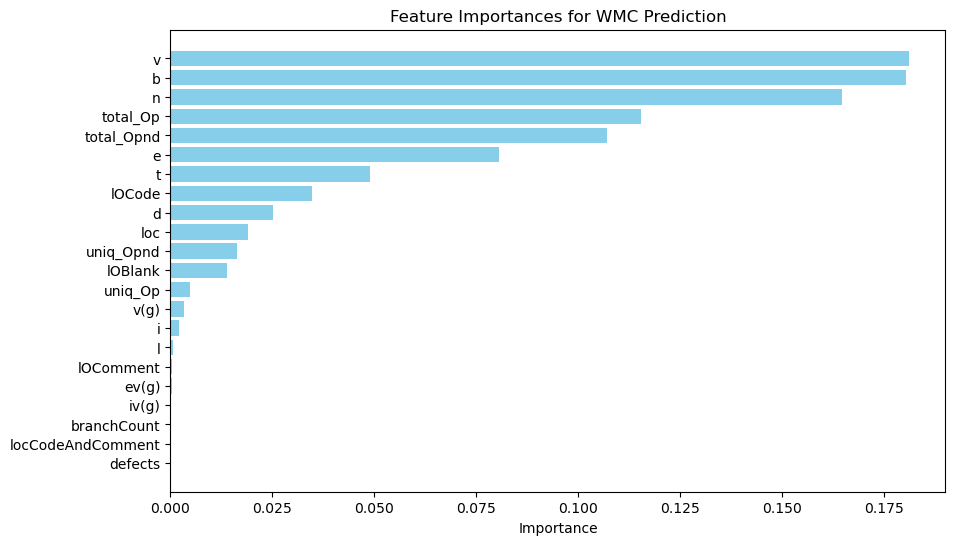

In [109]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances for Complexity Evaluation Prediction')
plt.show()

In [100]:
data = data.drop(["v_ScaledUp"], axis=1)

In [101]:
data = data.drop(["b_ScaledUp"], axis=1)

In [102]:
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,1
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,1
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,17.0,36.0,112.0,86.0,13.0,True,0
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,17.0,135.0,329.0,271.0,5.0,True,0
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,11.0,16.0,76.0,50.0,7.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,2,0,10.0,15.0,30.0,22.0,7.0,False,1
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,2,0,12.0,8.0,19.0,11.0,3.0,False,1
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,1,10,0,18.0,15.0,59.0,44.0,7.0,False,1
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,2,0,9.0,8.0,21.0,15.0,1.0,False,1


In [122]:
required_columns = ["v", "b", "n", "total_Op", "total_Opnd", "e", "t", "d"]

updated_data = data[required_columns]

In [123]:
updated_data

,v,b,n,total_Op,total_Opnd,e,t,d
0,1.30,1.30,1.3,1.2,1.2,1.30,1.30,1.30
1,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.00
2,1134.13,0.38,198.0,112.0,86.0,23029.10,1279.39,20.31
3,4348.76,1.45,600.0,329.0,271.0,74202.67,4122.37,17.06
4,599.12,0.20,126.0,76.0,50.0,10297.30,572.07,17.19
...,...,...,...,...,...,...,...,...
10880,241.48,0.08,52.0,30.0,22.0,1770.86,98.38,7.33
10881,129.66,0.04,30.0,19.0,11.0,1069.68,59.43,8.25
10882,519.57,0.17,103.0,59.0,44.0,13716.72,762.04,26.40
10883,147.15,0.05,36.0,21.0,15.0,1241.57,68.98,8.44


In [124]:
X = updated_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [142]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [143]:
y_pred = model.predict(X_test)

In [144]:
y_pred[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [145]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 0.00045934772622875517
Root Mean Squared Error (RMSE): 0.021432398984452376
R2 Score: 0.9966265948907711


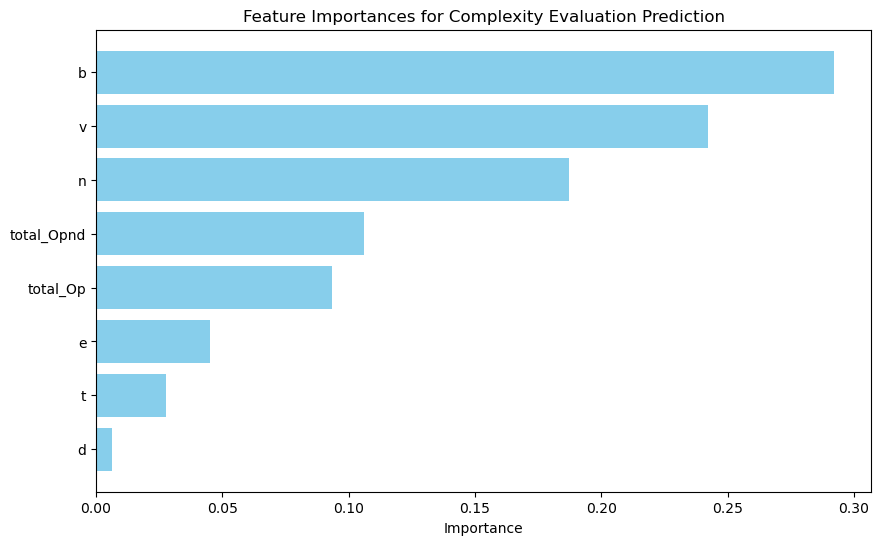

In [146]:
feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances for Complexity Evaluation Prediction')
plt.show()

In [133]:
import joblib
joblib.dump(model, "rfc_model.sav")

['rfc_model.sav']